# Confirmed positive cases of COVID-19 in Ontario


### Source: https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
DF = pd.read_csv("conposcovidloc-18-June.csv")

### Let's understand what the dataset is comprised of :

In [2]:
print (DF.describe())
print(DF.dtypes)

             Row_ID  Reporting_PHU_Latitude  Reporting_PHU_Longitude
count  32917.000000            32917.000000             32917.000000
mean   16459.000000               43.759082               -79.473995
std     9502.463742                0.709847                 1.542416
min        1.000000               42.308796               -94.488254
25%     8230.000000               43.647471               -79.708893
50%    16459.000000               43.656591               -79.379358
75%    24688.000000               43.898605               -79.379358
max    32917.000000               49.769615               -74.736298
Row_ID                         int64
Accurate_Episode_Date         object
Case_Reported_Date            object
Test_Reported_Date            object
Specimen_Date                 object
Age_Group                     object
Client_Gender                 object
Case_AcquisitionInfo          object
Outcome1                      object
Outbreak_Related              object
Reporting

In [3]:
DF.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-01-22,2020-01-23,2020-01-27,2020-01-25,50s,FEMALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
1,2,2020-01-21,2020-01-23,2020-01-27,2020-01-23,50s,MALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,2020-01-24,2020-01-24,2020-02-03,2020-01-24,20s,FEMALE,Travel,Resolved,NaN,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016
3,4,2020-02-05,2020-02-21,2020-02-24,2020-02-22,20s,FEMALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
4,5,2020-02-16,2020-02-25,2020-02-25,2020-02-25,60s,FEMALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


### There are several interesting attributes here. Given how COVID cases can be peculiar and this dataset being a snapshot in time at one province, a predictive model won't exactly prove useful. But let's try to create some visualizations to better understand the layout in Ontario and the insights the features might give.

In [4]:
rows = DF.shape[0]
columns = DF.shape[1]
print(rows)
print(columns)

32917
17


## Number of positive cases across a period of 4+ months. Dates are approximate. 

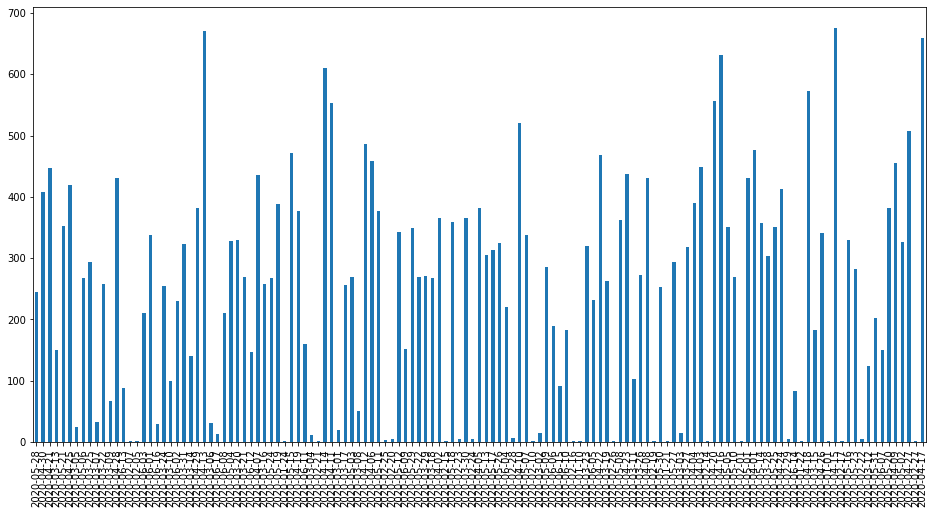

In [5]:
DF.Accurate_Episode_Date.value_counts(sort=False).plot.bar(figsize=(16,8))

### 13th and 15th of April reported the highest number of cases so far.

## Pie chart of case outcome.

Outcome1
Fatal            2553
Not Resolved     2360
Resolved        28004
dtype: int64


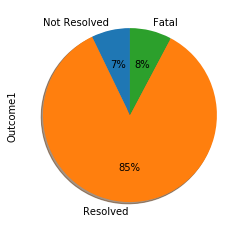

In [6]:
DF.Outcome1.value_counts(sort=False).plot.pie(autopct='%1.0f%%',shadow=True, startangle=90)
print(DF.groupby('Outcome1').size())

## Pie chart to show distribution of gender. (Surprisingly this data makes Canada stand out from other countries - who have reported their vast majority of cases to be men.)

Client_Gender
FEMALE         17770
MALE           14875
OTHER              8
TRANSGENDER        7
UNKNOWN          257
dtype: int64


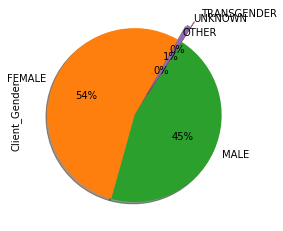

In [7]:
explode = (0,0,0,0.3,0.2)
DF.Client_Gender.value_counts(sort=False).plot.pie(autopct='%1.0f%%',shadow=True,startangle = 60,explode = explode)
print(DF.groupby('Client_Gender').size())

## City which has reported the highest number of cases.

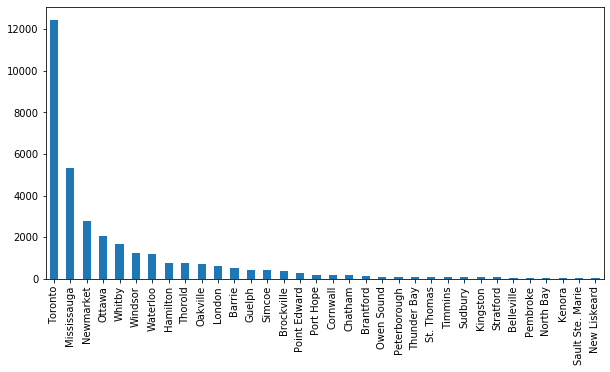

In [8]:
DF.Reporting_PHU_City.value_counts(sort=True).plot.bar(figsize = (10,5))

## The age group in Ontario that is more prone to COVID-19.

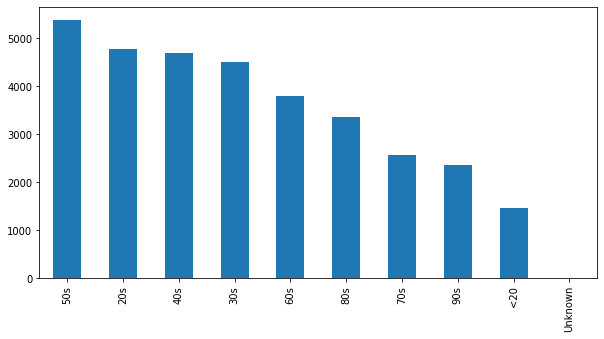

In [9]:
DF.Age_Group.value_counts(sort=True).plot.bar(figsize=(10,5))

## Case outcome v Gender. 

### Since there are more number of female cases, resolved and fatal outcomes could be higher for women.

AxesSubplot(0.125,0.125;0.775x0.755)


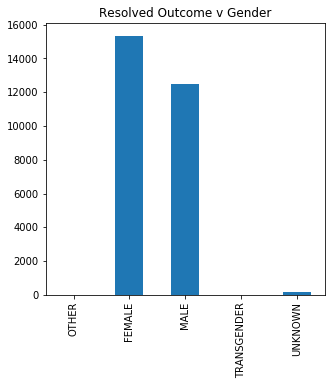

In [10]:
r_DF = DF.loc[DF['Outcome1'] == 'Resolved']
print(r_DF.Client_Gender.value_counts(sort=False).plot.bar(figsize=(5,5),title='Resolved Outcome v Gender'))

AxesSubplot(0.125,0.125;0.775x0.755)


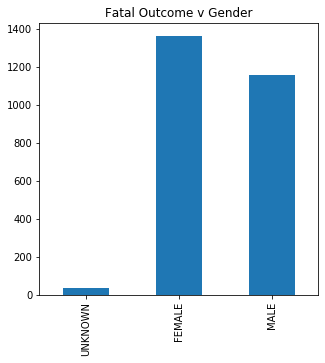

In [11]:
f_DF = DF.loc[DF['Outcome1'] == 'Fatal']
print(f_DF.Client_Gender.value_counts(sort=False).plot.bar(figsize=(5,5),title='Fatal Outcome v Gender'))

## Let's plot (Age + Gender) v Case Outcome to identify the weakest age group among males and females.

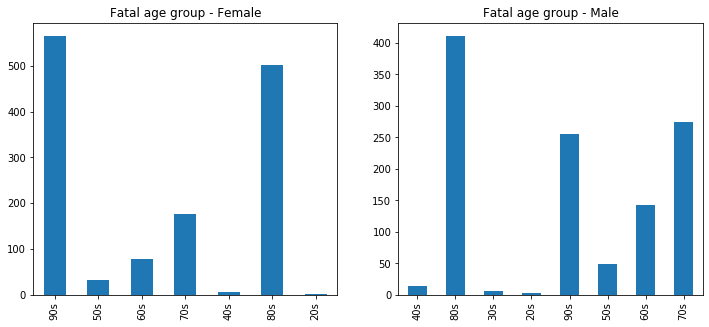

In [12]:
ff_DF = DF[(DF['Outcome1'] == 'Fatal') & (DF['Client_Gender'] == 'FEMALE')]
fm_DF = DF[(DF['Outcome1'] == 'Fatal') & (DF['Client_Gender'] == 'MALE')]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ff_DF.Age_Group.value_counts(sort=False).plot.bar(ax=axes[0], title='Fatal age group - Female')
fm_DF.Age_Group.value_counts(sort=False).plot.bar(ax=axes[1], title='Fatal age group - Male')

### The above charts make sense as people who are old can potentially succumb to the disease the most. But there is a stark difference between the above and the common age group for the whole dataset (across all 3 outcomes) - 50s

## Let's try similar graphs, but for Outcome v Public Health Units.  

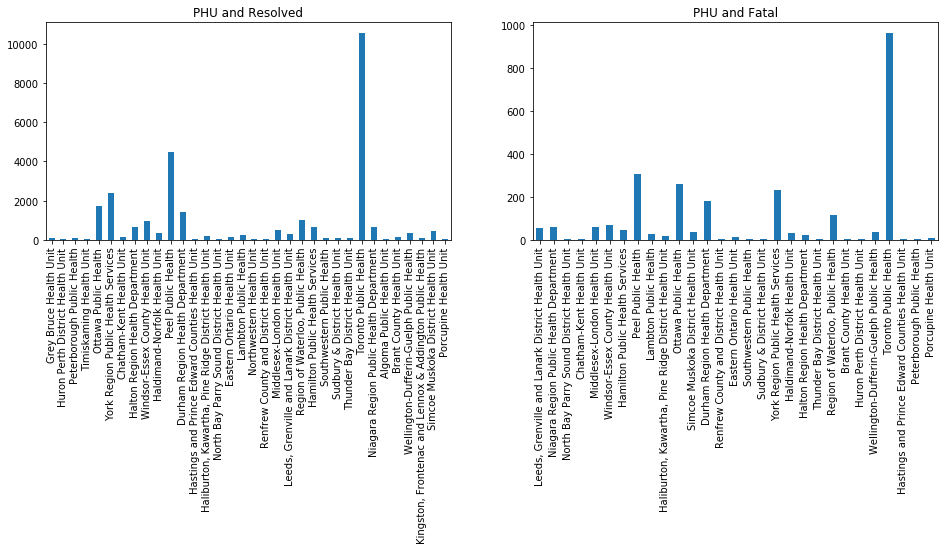

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
r_DF.Reporting_PHU.value_counts(sort=False).plot.bar(title='PHU and Resolved',ax=axes[0])
f_DF.Reporting_PHU.value_counts(sort=False).plot.bar(title='PHU and Fatal',ax=axes[1])

### This confirms that Toronto is an active hotspot for COVID-19 in Ontario. Owing definitely to its dense population and activity. As a result - the largest number of cases and its PHU reporting the most deaths and survivals. 

In [14]:
#To confirm if the numbers in the graphs are right:
print(r_DF.loc[r_DF['Reporting_PHU']== 'Toronto Public Health'].shape[0])
print(f_DF.loc[f_DF['Reporting_PHU']== 'Toronto Public Health'].shape[0])

10582
963


## Since we have location coordinates in the dataset, let's plot them on a map to see the case concentration.

In [15]:
import geopandas
gdf = geopandas.GeoDataFrame(DF, geometry=geopandas.points_from_xy(DF.Reporting_PHU_Longitude, DF.Reporting_PHU_Latitude))
geopandas.datasets.available
rows = gdf.shape[0]
columns = gdf.shape[1]
print(rows)
print(columns)

32917
18


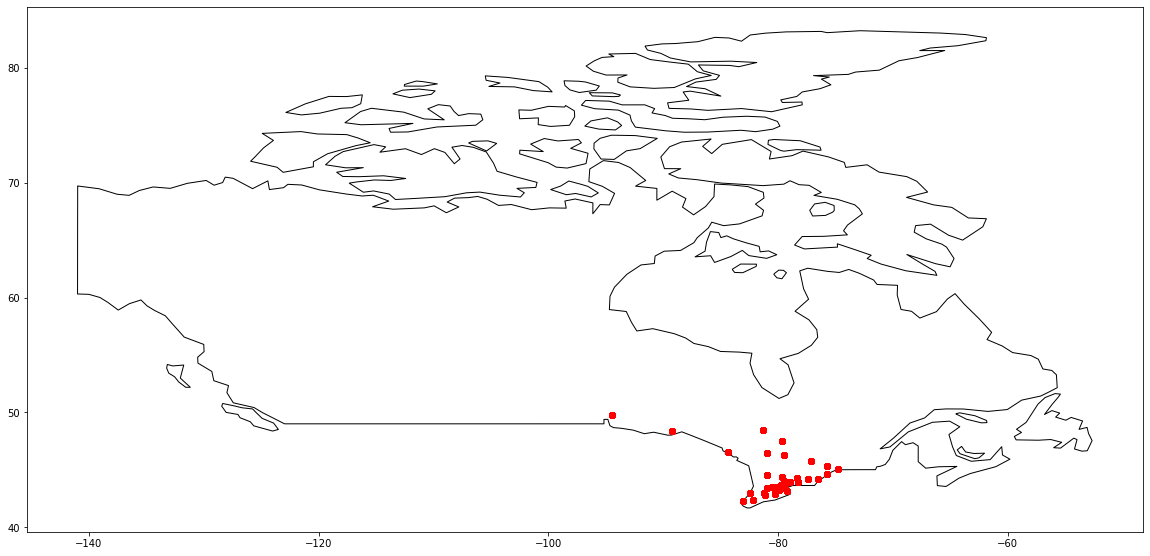

In [16]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#Restricting to North America - Canada
ax = world[world.name == 'Canada'].plot(figsize=(20,10),color='white', edgecolor='black')
#Plotting geodataframe
gdf.plot(ax=ax, color='red', figsize=(10,10))
plt.show()

## In all three outcomes, travel played the least important role.

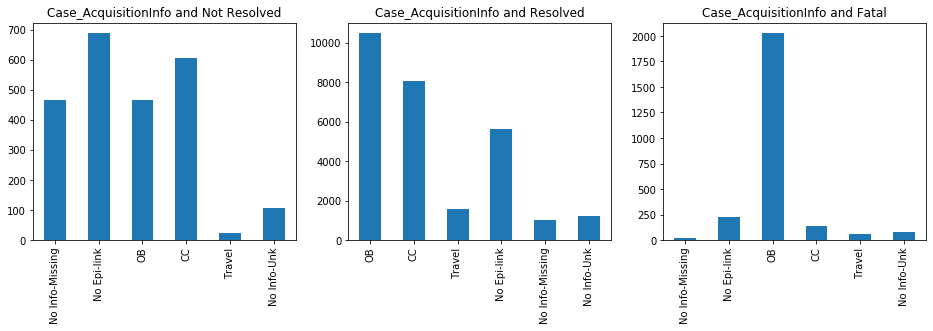

In [17]:
nr_DF = DF.loc[DF['Outcome1'] == 'Not Resolved']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
nr_DF.Case_AcquisitionInfo.value_counts(sort=False).plot.bar(title='Case_AcquisitionInfo and Not Resolved', ax=axes[0])
r_DF.Case_AcquisitionInfo.value_counts(sort=False).plot.bar(title='Case_AcquisitionInfo and Resolved', ax=axes[1])
f_DF.Case_AcquisitionInfo.value_counts(sort=False).plot.bar(title='Case_AcquisitionInfo and Fatal', ax=axes[2])

## Some ideas that can be tried:
### 1. Chi-Square test of Independence to check signficant relationship between two categorical attributes.
### 2. Use the dates to find a possible case growth trajectory ?